<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png">

# <span style="color:#EF7C8E">Heuristic Modeling</span>
### <span style="color:#726060"> Sara Aldubaie</span>
<hr style="border:2px solid gray"> </hr>

In [1]:
#here is an example of how to build and populate a hurestic model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score
import random
from sklearn.model_selection import train_test_split



In [2]:
# Load Data
df = pd.read_csv('seattle_weather_1948-2017.csv')
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [3]:
def RAIN_INSERTION(cols):
    """
    Insert False where NaN values are present
    """
    RAIN=cols[0]
    if pd.isnull(RAIN):
        return False
    else:
        return RAIN
def PRCP_INSERTION(col):
    """
    Insert the Mean of PRCP where NaN values are present
    """
    PRCP=col[0]
    if pd.isnull(PRCP):
        return df['PRCP'].mean()
    else:
        return PRCP
    
# Apply the functions
df['RAIN']=df[['RAIN']].apply(RAIN_INSERTION,axis=1)
df['PRCP']=df[['PRCP']].apply(PRCP_INSERTION,axis=1)

#Dropping the outliers from TMIN column
df=df.drop(df[df['TMIN']<17 ].index)

#Dropping the outliers from TMAX columns i.e. the value more than 100
df=df.drop(df[(df['TMAX']>97.5) | (df['TMAX']< 21.5)].index)

#Dropping the outliers from PRCP columns i.e. the value more than 0.275
df=df.drop(df[(df['PRCP']>0.25) | (df['PRCP']< -0.15) ].index)

# Reset index and drop index column
df = df.reset_index().drop("index", axis=1)

In [4]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-05,0.17,45,32,True
1,1948-01-08,0.04,48,35,True
2,1948-01-09,0.12,50,31,True
3,1948-01-11,0.01,42,32,True
4,1948-01-12,0.00,41,26,False


In [5]:
# dataframe with only rainy days
raint = df[df['RAIN']== True] # to do more analyses 
# dataframe with only sunny days
rainf = df[df['RAIN']== False] # to do more analyses 

Text(0.5, 1.0, 'Sunny , TMIN')

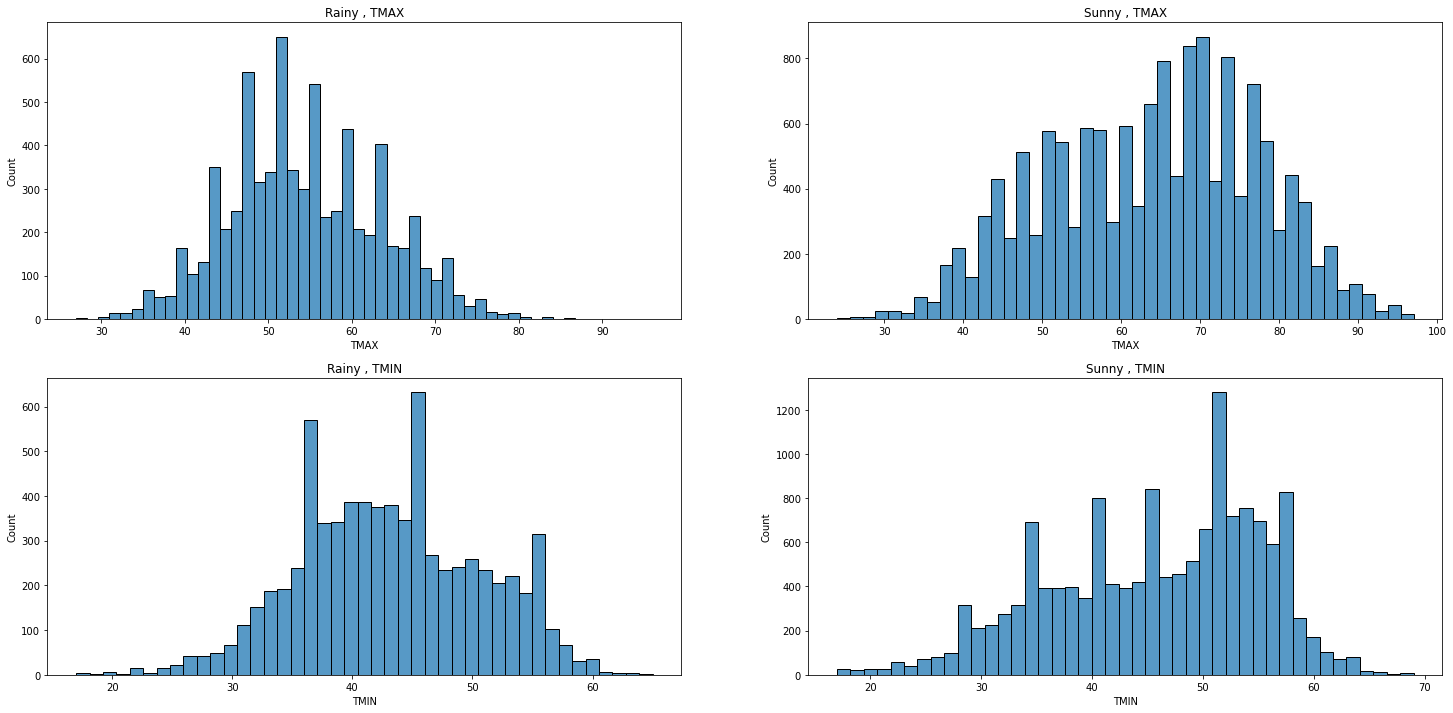

In [6]:
fig, axes = plt.subplots(figsize=(25,12), ncols=2, nrows=2) # sub plot with 1 row and 3 columns 
ax0 =sns.histplot(x=raint['TMAX'], ax=axes[0,0])
ax0.set_title('Rainy , TMAX')
ax1 =sns.histplot(x=rainf['TMAX'], ax=axes[0,1])
ax1.set_title('Sunny , TMAX')
ax2 =sns.histplot(x=raint['TMIN'], ax=axes[1,0])
ax2.set_title('Rainy , TMIN')
ax3 =sns.histplot(x=rainf['TMIN'], ax=axes[1,1])
ax3.set_title('Sunny , TMIN')

### Conditions based on analyzing the chart: 
#### For sunny day:
1. PRCP equal 0
2. TMAX is between 40 and 85 
3. TMIN is between 28 and 57

#### For rainy day:
1. PRCP greater than 0
2. TMAX is between 42 and 70 
3. TMIN is between 30 and 57 

In [7]:
# Create function to perform our heuristic

def heuristic(df):
    
    preds = []
    for day in range(len(df)):
        if day == 0: 
            preds.append(False)
        # If sunny day
        elif (df.iloc[day-1]["PRCP"] == 0 ) & ((40 <= df.iloc[day]["TMAX"] <= 85) & (28 <= df.iloc[day]["TMIN"] <= 57)):
            preds.append(False)
        # If rainy day
        elif (df.iloc[day-1]["PRCP"] > 0 ) & ((42 <= df.iloc[day]["TMAX"] <= 70) & (30 <= df.iloc[day]["TMIN"] <= 57)):
            preds.append(True)
        else: 
            # Predict false if the above is not true
            preds.append(False)
    return preds

In [8]:
# Apply Heuristic
df["preds"] = heuristic(df)

df.head(10)

,DATE,PRCP,TMAX,TMIN,RAIN,preds
0,1948-01-05,0.17,45,32,True,False
1,1948-01-08,0.04,48,35,True,True
2,1948-01-09,0.12,50,31,True,True
3,1948-01-11,0.01,42,32,True,True
4,1948-01-12,0.00,41,26,False,False
5,1948-01-13,0.00,45,29,False,False
6,1948-01-14,0.00,38,26,False,False
7,1948-01-15,0.00,34,31,False,False
8,1948-01-16,0.00,34,28,False,False
9,1948-01-17,0.00,35,29,False,False


In [9]:
# Determine Accuracy

# Create function to to find values

def calc_confuse(df):
    
    "Calculate all possible results of a confusion matrix"

    # Hold all possible values and set to zero
    FP = np.zeros(len(df))
    TP = np.zeros(len(df))
    FN = np.zeros(len(df))
    TN = np.zeros(len(df))
    
    for x in range(len(df)):
        
        # True Positive
        if (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == True):
            TP[x] = 1
        # True Negative
        elif (df["RAIN"].iloc[x] == False) & (df["preds"].iloc[x] == False):
            TN[x] = 1
        # False Negative
        elif (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == False):
            FN[x] = 1
        # False Positive
        else:
            FP[x] = 1
    
    return FP, TP, FN, TN

In [10]:
# Extract results and create columns for each
w,x,y,z = calc_confuse(df)

df["FP"] = w
df["TP"] = x
df["FN"] = y
df["TN"] = z

# Look at 10 random rows to determin accuracy
df.sample(10)

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN
8622,1975-11-19,0.00,50,40,False,False,0.0,0.0,0.0,1.0
8823,1976-07-18,0.00,77,54,False,False,0.0,0.0,0.0,1.0
20860,2014-08-05,0.00,77,57,False,False,0.0,0.0,0.0,1.0
496,1949-08-08,0.00,73,54,False,False,0.0,0.0,0.0,1.0
12562,1988-03-29,0.07,53,38,True,True,0.0,1.0,0.0,0.0
9067,1977-04-09,0.03,55,42,True,True,0.0,1.0,0.0,0.0
7647,1972-09-27,0.00,51,35,False,True,1.0,0.0,0.0,0.0
12572,1988-04-11,0.00,64,44,False,False,0.0,0.0,0.0,1.0
13421,1991-01-04,0.00,40,28,False,False,0.0,0.0,0.0,1.0
3635,1959-11-27,0.00,51,31,False,False,0.0,0.0,0.0,1.0


In [11]:
# Calculate Accuracy
(sum(df["TP"]) + sum(df["TN"])) / len(df)

0.7018681770428904

## Accuracy: 
#### * The model have accuracy of  95%

# 2. Determine the Precision, Recall, and Accuracy

In [12]:
# Create A Function to Calculate Precision
def precision(TP, FP):

    return TP.sum()/(TP.sum() +FP.sum())

precision(df["TP"], df["FP"])

0.5634857415963039

In [13]:
precision_score(df["RAIN"], df["preds"])

0.5634857415963039

In [14]:
# Create A Function to Calculate Recall
def recall(TP, FN):
    return TP.sum()/(TP.sum() + FN.sum())

recall(df["TP"], df["FN"])

0.4829328235936647

In [15]:
# Your recall function should equal this value
recall_score(df["RAIN"], df["preds"])

0.4829328235936647

In [16]:
# Create a Function to Calculate Accuracy
def accuracy(TP, FP, TN, FN):
    return(TP.sum() + TN.sum())/(TP.sum() + TN.sum() + FP.sum() + FN.sum())

accuracy(df["TP"], df["FP"], df["TN"], df["FN"])

0.7018681770428904

In [17]:
# Your accuracy score function should equal this value
accuracy_score(df["RAIN"], df["preds"])

0.7018681770428904

# 3. Predict the PRCP

In [18]:
#find the correlation between PRCP and TMAX
df['PRCP'].corr(df['TMAX'])

-0.2856314353775257

In [19]:
#find the correlation between PRCP and TMIN 
df['PRCP'].corr(df['TMIN'])

-0.11259465367685802

In [20]:
#find the correlation between PRCP and RAIN
df['PRCP'].corr(df['RAIN'])

0.7274140013412991

In [21]:
# calculate all correlations in df
df.corr()

,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN
PRCP,1.000000,-0.285631,-0.112595,0.727414,0.254308,-0.194965,0.487759,0.432800,-0.559223
TMAX,-0.285631,1.000000,0.868420,-0.350033,-0.295060,-0.137898,-0.238569,-0.204509,0.422946
TMIN,-0.112595,0.868420,1.000000,-0.135530,-0.163516,-0.117574,-0.095210,-0.076422,0.206374
RAIN,0.727414,-0.350033,-0.135530,1.000000,0.307643,-0.268174,0.619112,0.645026,-0.768684
preds,0.254308,-0.295060,-0.163516,0.307643,1.000000,0.596576,0.692369,-0.289953,-0.687353
FP,-0.194965,-0.137898,-0.117574,-0.268174,0.596576,1.000000,-0.166030,-0.172979,-0.410058
TP,0.487759,-0.238569,-0.095210,0.619112,0.692369,-0.166030,1.000000,-0.200754,-0.475902
FN,0.432800,-0.204509,-0.076422,0.645026,-0.289953,-0.172979,-0.200754,1.000000,-0.495821
TN,-0.559223,0.422946,0.206374,-0.768684,-0.687353,-0.410058,-0.475902,-0.495821,1.000000


<AxesSubplot:xlabel='PRCP', ylabel='Count'>

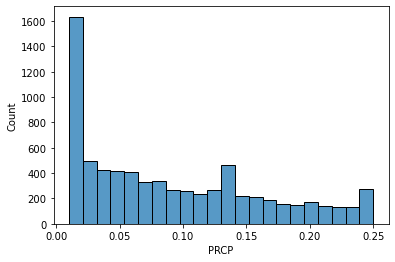

In [22]:
sns.histplot(x=raint['PRCP'])

In [23]:
# Create function to perform our heuristic

def heuristic_PRCP(df):
    
    preds_PRCP = []
    for day in range(len(df)):
            if day == 0: 
                preds_PRCP.append(0)
            # in sunny day PRCP = 0
            elif (df.iloc[day-1]["RAIN"] == False ):
                preds_PRCP.append(0)
            # in rainy day PRCP is between 0.1 and 0.25
            else:
                preds_PRCP.append(round(random.uniform(0.1, 0.25),2))
            
    return preds_PRCP

In [24]:
# Apply Heuristic
df["preds_PRCP"] = heuristic_PRCP(df)

df.head(10)

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN,preds_PRCP
0,1948-01-05,0.17,45,32,True,False,0.0,0.0,1.0,0.0,0.00
1,1948-01-08,0.04,48,35,True,True,0.0,1.0,0.0,0.0,0.22
2,1948-01-09,0.12,50,31,True,True,0.0,1.0,0.0,0.0,0.15
3,1948-01-11,0.01,42,32,True,True,0.0,1.0,0.0,0.0,0.19
4,1948-01-12,0.00,41,26,False,False,0.0,0.0,0.0,1.0,0.17
5,1948-01-13,0.00,45,29,False,False,0.0,0.0,0.0,1.0,0.00
6,1948-01-14,0.00,38,26,False,False,0.0,0.0,0.0,1.0,0.00
7,1948-01-15,0.00,34,31,False,False,0.0,0.0,0.0,1.0,0.00
8,1948-01-16,0.00,34,28,False,False,0.0,0.0,0.0,1.0,0.00
9,1948-01-17,0.00,35,29,False,False,0.0,0.0,0.0,1.0,0.00


In [25]:
# adding column for mean 
PRCP_List = []
for row in range(len(df)):
    PRCP_List.append(df['PRCP'].mean())
    
df["PRCP_mean"] = PRCP_List

In [26]:
# Your accuracy score function should equal this value
mean_squared_error(df["PRCP"],  df["preds_PRCP"])

0.009264095788561159

In [27]:
mean_squared_error(df["PRCP_mean"],  df["preds_PRCP"])

0.008241978966337818

Did you do better than predicting the mean value for the PRCP column?
 
No

# Assignment ML3

In [29]:

# SSE also known as RSS 
def SSE(train, test): 
    return((train - test)**2).sum()


In [30]:

precision = np.zeros(5)
recall = np.zeros(5)
MSE = np.zeros(5)
MAE = np.zeros(5)
SSE_list = np.zeros(5)

# looping five times
for x in range(5):
    
    # split
    training, testing = train_test_split(
    df, 
    train_size=0.8, # 80%
    test_size=0.2, #20%
    )
    
    # precision
    precision[x]=(precision_score(testing["RAIN"], testing["preds"]))
    # recall
    recall[x]=(recall_score(testing["RAIN"], testing["preds"]))
    #MSE
    MSE[x]=(mean_squared_error(testing["PRCP"], testing["preds_PRCP"]))
    # MAE
    MAE[x]=(mean_absolute_error(testing["PRCP"], testing["preds_PRCP"]))
    # SSE
    SSE_list[x]=(SSE(testing["PRCP"], testing["preds_PRCP"]))


print(f"precision: {precision.mean()}, \nrecall: {recall.mean()}, \nMSE: {MSE.mean()},\nMAE: { MAE.mean()}, \nSSE: {SSE_list.mean()}")


    

precision: 0.5635545801294435, 
recall: 0.4864756273881716, 
MSE: 0.009317534376110945,
MAE: 0.057983608500124406, 
SSE: 40.80148303298982
